In [1]:
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


def read_grid(File):
    ''' 
    read_grid - Reads a CSV file
    Parameters
    ----------
    File : CSV file
    
    Returns
    -------
    X    : X axis of grid      : Numpy array
    Y    : Y axis of grid      : Numpy array
    Grid : XY grid of energies : 2d numpy array
    '''
    Data = np.genfromtxt(File, delimiter=',', dtype="float")
    
    X = Data[0]
    X = np.delete(X, 0)
    Y = (Data[:,0])
    Y = np.delete(Y, 0)

    Grid = np.array([])
    
    for i in range(1, (X.size + 1)):
        Temp = Data[:,i]
        Temp = np.delete(Temp, 0)
        Grid = np.append(Grid, Temp)
    
    Grid = np.reshape(Grid, (X.size, Y.size))
    return X, Y, Grid 

def grid_plot(X, Y, Grid):
    '''
    grid_plot - Plot the energy surface
    
    Parameters
    ----------
    X    : X axis of grid      : Numpy array
    Y    : Y axis of grid      : Numpy array
    Grid : XY grid of energies : 2d numpy array
    '''
    X, Y = np.meshgrid(X, Y)
    plt.contourf(X, Y, Grid, 25, cmap='jet', interpolation='nearest')
    plt.xlabel("Displacement in X (" r'$\AA$' ")", fontsize=18)
    plt.ylabel("Displacement in Y (" r'$\AA$' ")", fontsize=18)
    plt.tick_params(labelsize=14)
    plt.tight_layout()
    plt.colorbar()
    plt.show()
    plt.close()


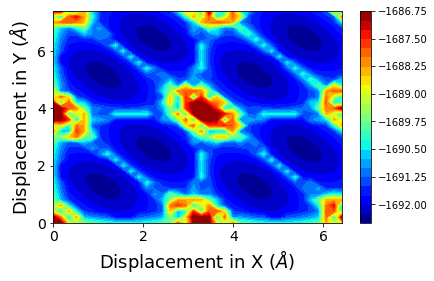

In [2]:
X, Y, Grid = ReadGrid_V2("111-UO.csv")
Name = "111-UO"
GridPlot(X, Y, Grid, Name)